# **2015 Gorkha Earthquake: Seismic Damage Assessment**

#### **Richter's Predictor: Modeling Earthquake Damage**


---


Competition hosted by [datadriven.org](https://www.drivendata.org/competitions/57/nepal-earthquake/)


The main aim is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal based on aspects of building location and construction. The dataset used is ***Richter's Predictor: Modeling Earthquake Damage*** which is present in [datadriven.org](https://www.drivendata.org/competitions/57/nepal-earthquake/) competition. This data was collected by Kathmandu Living Labs and the Central Bureau of Statistics, which works under the National Planning Commission Secretariat of Nepal. It contains valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.






We try to predict the ordinal variable **damage_grade**, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:
1. represents low damage
2. represents a medium amount of damage
3. represents almost complete destruction








## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns

# functions needed 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize


from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

import time
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN


In [12]:
#from google.colab import drive
#drive.mount('/content/drive')

## **Import Dataset**

In [13]:
'''
#For colab: /content/drive/MyDrive/Earthquake Damage/train_values.csv
import pandas as pd
train_df=pd.read_csv("/content/drive/MyDrive/Earthquake Damage/train_values.csv")
label_df= pd.read_csv("/content/drive/MyDrive/Earthquake Damage/train_labels.csv")
test_df= pd.read_csv("/content/drive/MyDrive/Earthquake Damage/test_values.csv")

#kaggle
train_df = pd.read_csv(os.path.join(root_path, 'train_values.csv'))
label_df = pd.read_csv(os.path.join(root_path, 'train_labels.csv'))
test_df = pd.read_csv(os.path.join(root_path, 'test_values.csv'))

'''

#For jupyter notebook
import pandas as pd
train_df=pd.read_csv(r"./data/train_values.csv")
label_df= pd.read_csv(r"./data/train_labels.csv")
test_df= pd.read_csv(r"./data/test_values.csv")

## **Exploratory Data Analysis**

In [14]:
df = pd.merge(train_df, label_df, on='building_id')

In [15]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


Shape of training and testing datasets

In [16]:
print("Shape of the train dataset is : ",train_df.shape)
print("Shape of the test dataset is  : ",test_df.shape)

Shape of the train dataset is :  (260601, 39)
Shape of the test dataset is  :  (86868, 39)


Dataset Information

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Check null and missing values

In [18]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Check unique values

In [19]:
# exploring the statstical fearures of train dataset (object).
df.nunique()

building_id                               260601
geo_level_1_id                                31
geo_level_2_id                              1414
geo_level_3_id                             11595
count_floors_pre_eq                            9
age                                           42
area_percentage                               84
height_percentage                             27
land_surface_condition                         3
foundation_type                                5
roof_type                                      3
ground_floor_type                              5
other_floor_type                               4
position                                       4
plan_configuration                            10
has_superstructure_adobe_mud                   2
has_superstructure_mud_mortar_stone            2
has_superstructure_stone_flag                  2
has_superstructure_cement_mortar_stone         2
has_superstructure_mud_mortar_brick            2
has_superstructure_c

## **Class labels - Low damage, Medium damage and Complete damage**

In [20]:
y = label_df['damage_grade']

In [21]:
y.unique()

array([3, 2, 1])

In [22]:
values = y.value_counts()
values

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

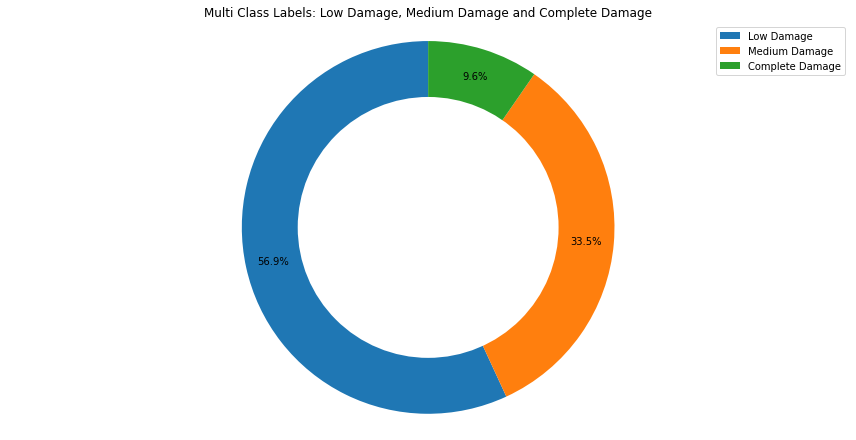

In [23]:
# Creating plot
plt.figure(figsize=(12,6))
labels = ["medium_damage", "complete damage", "low damage"]
plt.pie(values, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# show plot
plt.axis('equal')  
plt.tight_layout()
plt.title("Multi Class Labels: Low Damage, Medium Damage and Complete Damage")
plt.show()

In [24]:
x = train_df #features    
y_ig  = label_df['damage_grade'] #class label

## **Histograms**

Various histograms are generated to analyse and understand the relation of each feature with the class label

In [25]:
sns.set(style="darkgrid")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


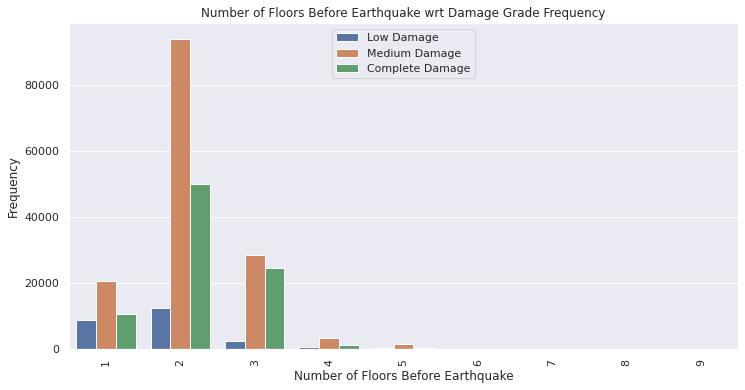

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(df["count_floors_pre_eq"], hue=df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Number of Floors Before Earthquake")
plt.xticks(rotation=90)
plt.title("Number of Floors Before Earthquake wrt Damage Grade Frequency")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

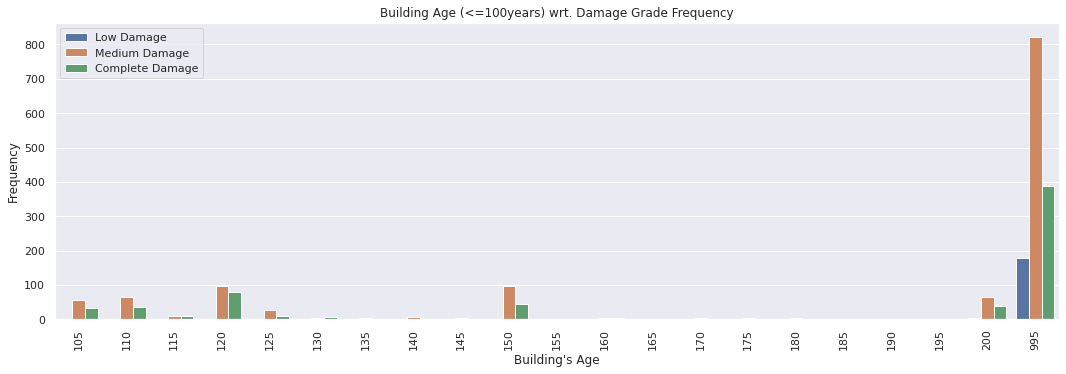

In [27]:
plt.figure(figsize=(18,12))
plt.subplot(211)
age_less_than_100=df[df['age']>100]
sns.countplot(x='age',data=age_less_than_100,hue='damage_grade')
plt.ylabel("Frequency")
plt.xlabel("Building's Age")
plt.xticks(rotation=90)
plt.title("Building Age (<=100years) wrt. Damage Grade Frequency")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

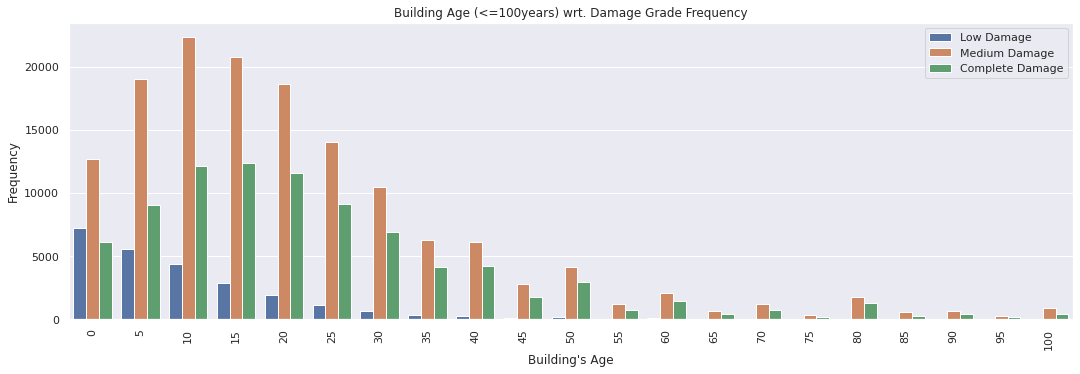

In [28]:
plt.figure(figsize=(18,12))
plt.subplot(211)
age_less_than_100=df[df['age']<=100]
sns.countplot(x='age',data=age_less_than_100,hue='damage_grade')
plt.ylabel("Frequency")
plt.xlabel("Building's Age")
plt.xticks(rotation=90)
plt.title("Building Age (<=100years) wrt. Damage Grade Frequency")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()


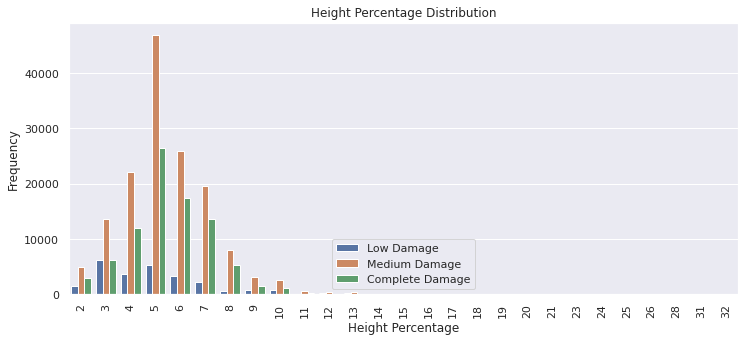

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(x=df["height_percentage"],hue=df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Height Percentage")
plt.xticks(rotation=90)
plt.title("Height Percentage Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

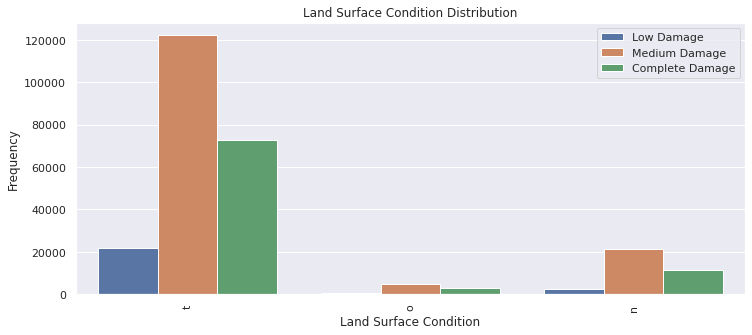

In [30]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["land_surface_condition"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Land Surface Condition")
plt.xticks(rotation=90)
plt.title("Land Surface Condition Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

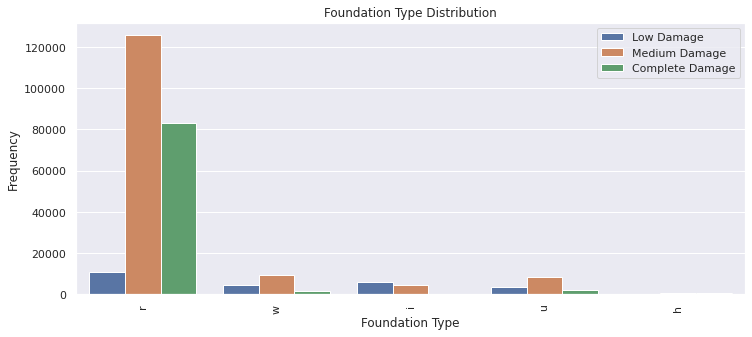

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["foundation_type"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Foundation Type")
plt.xticks(rotation=90)
plt.title("Foundation Type Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

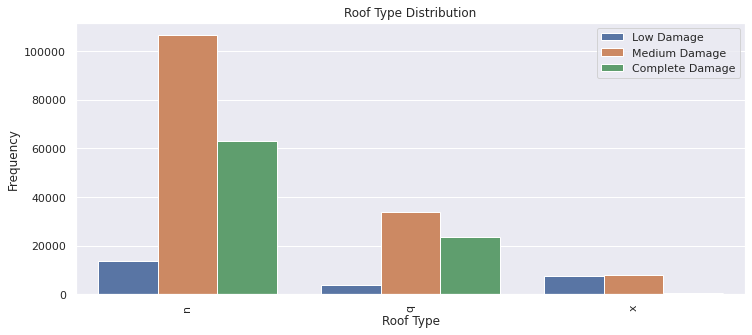

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["roof_type"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Roof Type")
plt.xticks(rotation=90)
plt.title("Roof Type Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

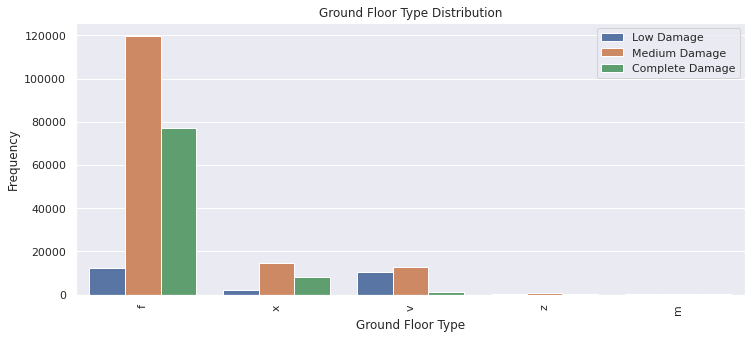

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["ground_floor_type"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Ground Floor Type")
plt.xticks(rotation=90)
plt.title("Ground Floor Type Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

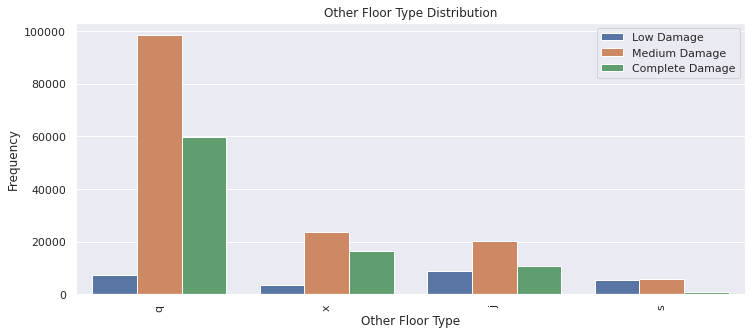

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["other_floor_type"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Other Floor Type")
plt.xticks(rotation=90)
plt.title("Other Floor Type Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

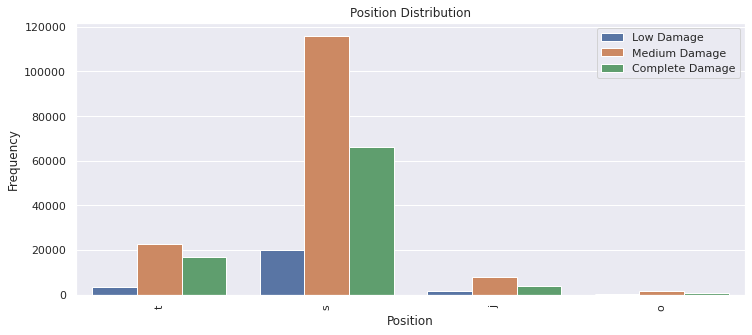

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["position"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Position")
plt.xticks(rotation=90)
plt.title("Position Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

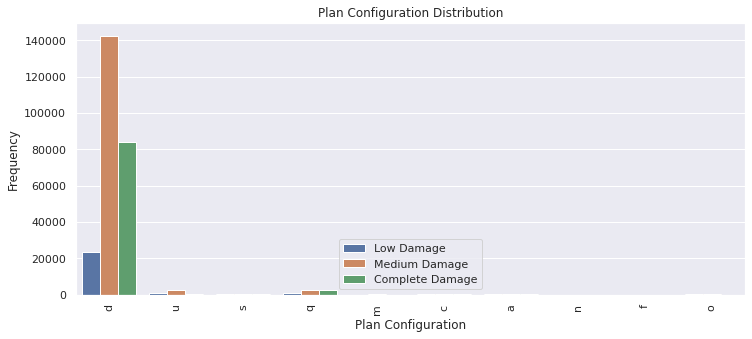

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["plan_configuration"], hue = label_df["damage_grade"])
plt.ylabel("Frequency") 
plt.xlabel("Plan Configuration")
plt.xticks(rotation=90)
plt.title("Plan Configuration Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

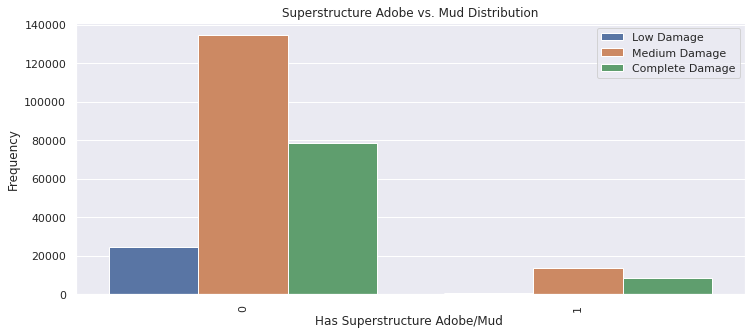

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_superstructure_adobe_mud"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Superstructure Adobe/Mud ")
plt.xticks(rotation=90)
plt.title("Superstructure Adobe vs. Mud Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()


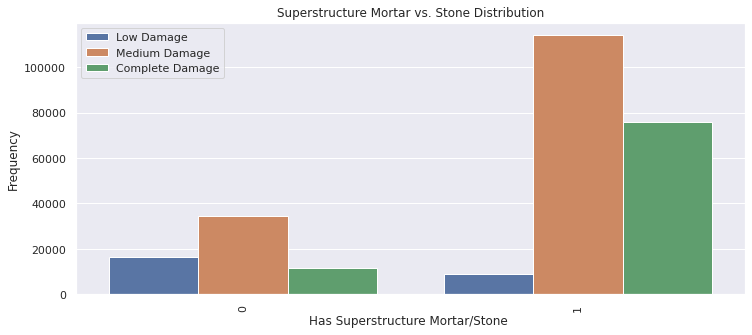

In [38]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_superstructure_mud_mortar_stone"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Superstructure Mortar/Stone ")
plt.xticks(rotation=90)
plt.title("Superstructure Mortar vs. Stone Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

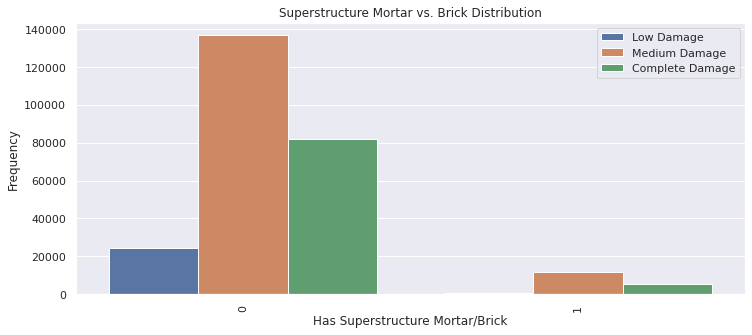

In [39]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_superstructure_mud_mortar_brick"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Superstructure Mortar/Brick")
plt.xticks(rotation=90)
plt.title("Superstructure Mortar vs. Brick Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

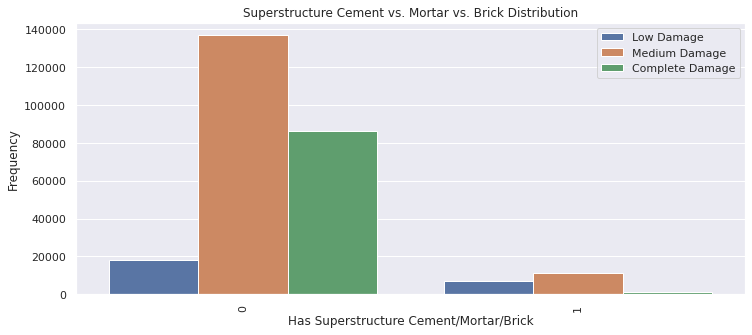

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_superstructure_cement_mortar_brick"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Superstructure Cement/Mortar/Brick")
plt.xticks(rotation=90)
plt.title("Superstructure Cement vs. Mortar vs. Brick Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

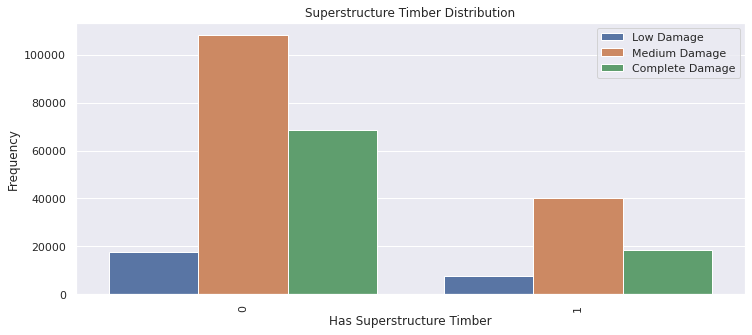

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_superstructure_timber"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Superstructure Timber")
plt.xticks(rotation=90)
plt.title("Superstructure Timber Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

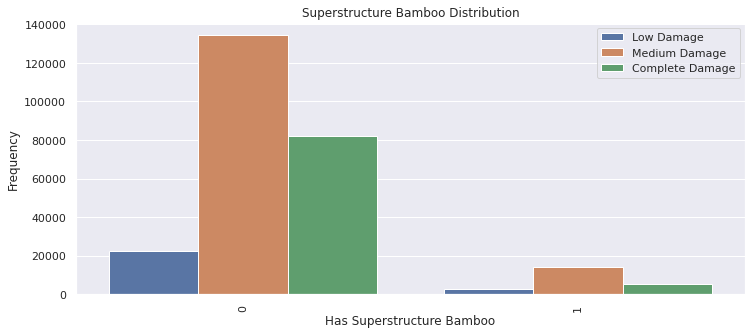

In [42]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_superstructure_bamboo"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Superstructure Bamboo")
plt.xticks(rotation=90)
plt.title("Superstructure Bamboo Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

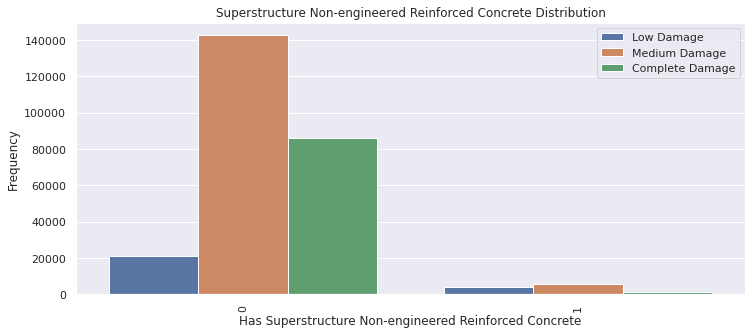

In [43]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_superstructure_rc_non_engineered"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Superstructure Non-engineered Reinforced Concrete")
plt.xticks(rotation=90)
plt.title("Superstructure Non-engineered Reinforced Concrete Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

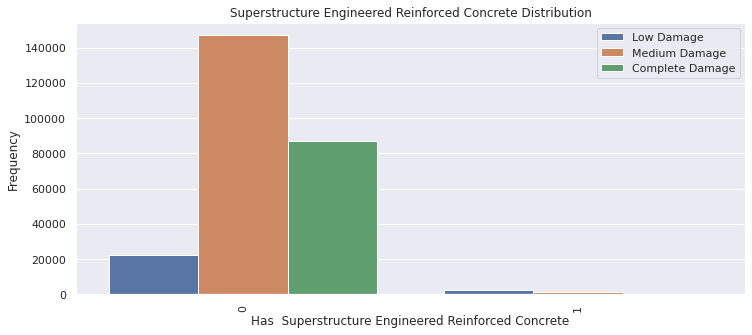

In [44]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_superstructure_rc_engineered"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has  Superstructure Engineered Reinforced Concrete")
plt.xticks(rotation=90)
plt.title("Superstructure Engineered Reinforced Concrete Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

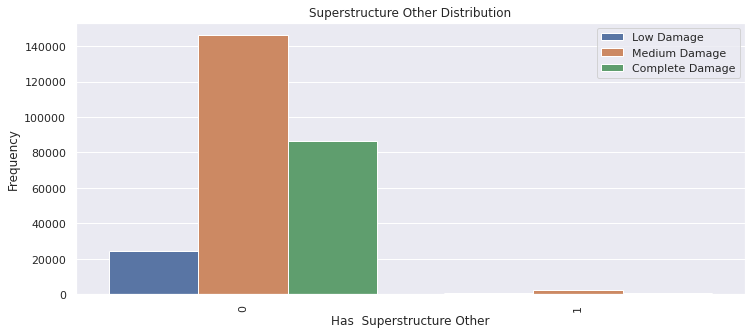

In [45]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_superstructure_other"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has  Superstructure Other")
plt.xticks(rotation=90)
plt.title("Superstructure Other Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

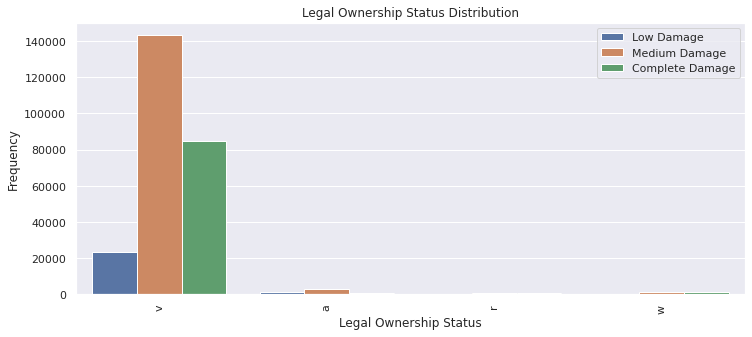

In [46]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["legal_ownership_status"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Legal Ownership Status")
plt.xticks(rotation=90)
plt.title("Legal Ownership Status Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

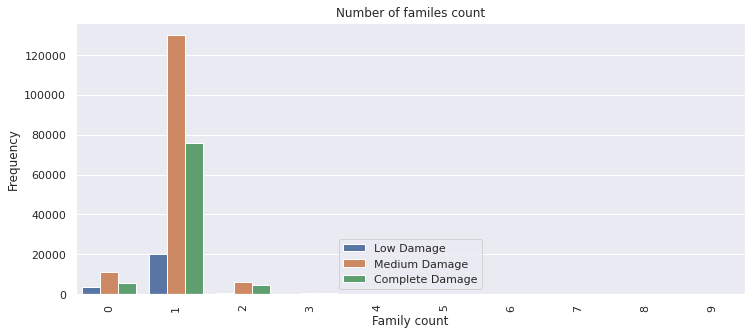

In [47]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["count_families"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Family count")
plt.xticks(rotation=90)
plt.title("Number of familes count")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

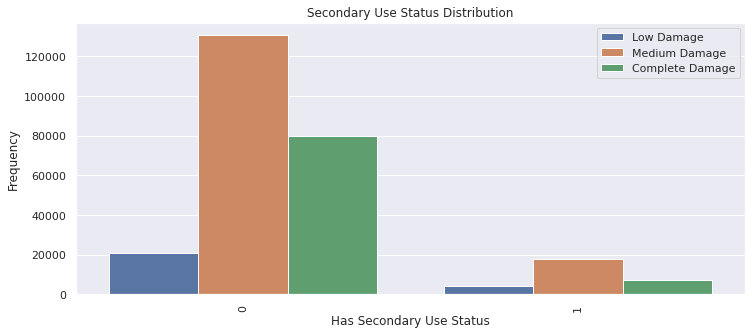

In [48]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_secondary_use"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Secondary Use Status")
plt.xticks(rotation=90)
plt.title("Secondary Use Status Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

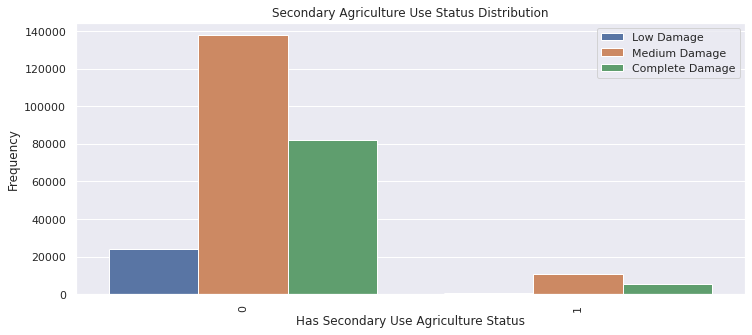

In [49]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_secondary_use_agriculture"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Secondary Use Agriculture Status")
plt.xticks(rotation=90)
plt.title("Secondary Agriculture Use Status Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

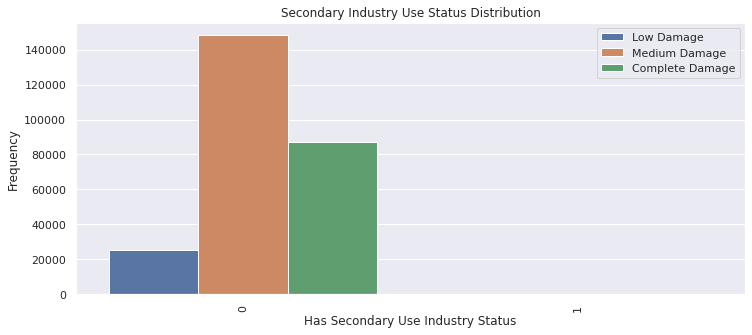

In [50]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_secondary_use_industry"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Secondary Use Industry Status")
plt.xticks(rotation=90)
plt.title("Secondary Industry Use Status Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

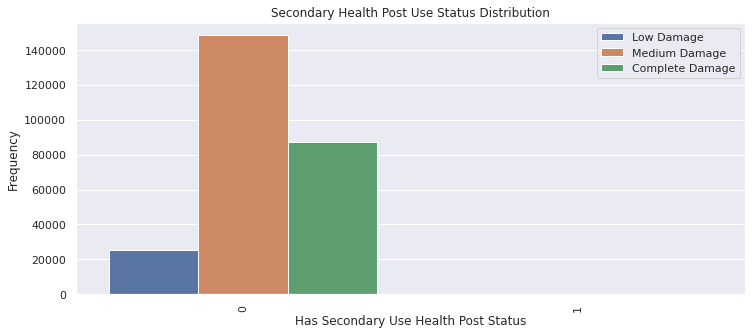

In [51]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_secondary_use_health_post"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Secondary Use Health Post Status")
plt.xticks(rotation=90)
plt.title("Secondary Health Post Use Status Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

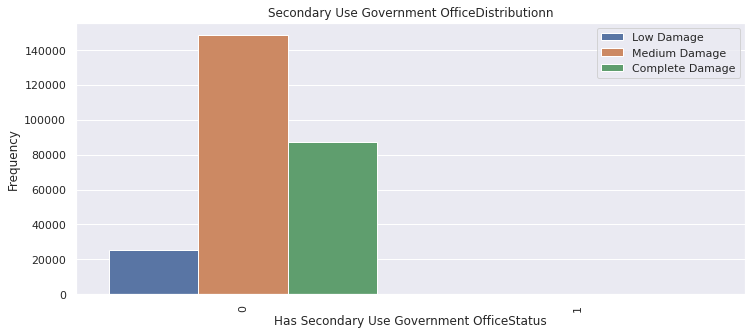

In [52]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_secondary_use_gov_office"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Secondary Use Government OfficeStatus")
plt.xticks(rotation=90)
plt.title("Secondary Use Government OfficeDistributionn")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

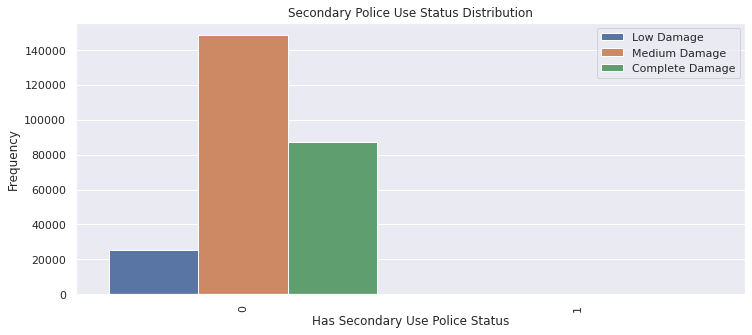

In [53]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_secondary_use_use_police"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Secondary Use Police Status")
plt.xticks(rotation=90)
plt.title("Secondary Police Use Status Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

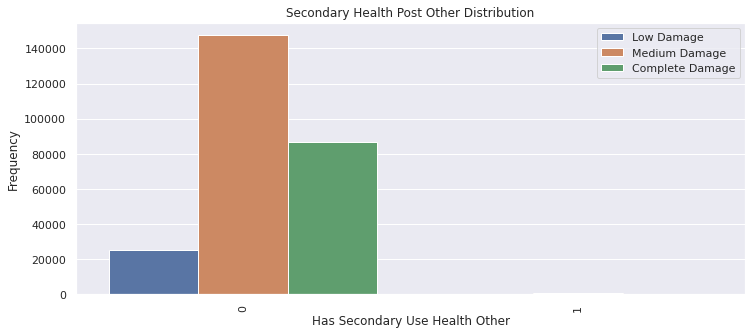

In [54]:
plt.figure(figsize=(12,5))
sns.countplot(x = train_df["has_secondary_use_other"], hue = label_df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Has Secondary Use Health Other")
plt.xticks(rotation=90)
plt.title("Secondary Health Post Other Distribution")
plt.legend(["Low Damage","Medium Damage","Complete Damage"])
plt.show()

##**Data Preprocessing**



###**Label Encoding**
Since the dataset contains categorical values, we use label encoding to convert the categorical variables into numerical values. 

Categorical values present in the dataset are land_surface_condition, foundation_type, roof_type, ground_floor_type, other_floor_type, position, plan_configuration, legal_ownership_status.

In [55]:
#Train data

# label encoding the categorical variables
label_encoding_columns=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']

# label encoding categorical columns in train dataset 
for i in label_encoding_columns:
    df[i]=df[i].astype("category")
    df[i]=df[i].cat.codes

# label encoding categorical columns in test dataset
for j in label_encoding_columns:
    test_df[j]=test_df[j].astype("category")
    test_df[j]=test_df[j].cat.codes

In [56]:
x = df #features    
y  = df['damage_grade'] #class label

### **Outliers Detection**

 Boxplots visualization ***before*** removal of outliers

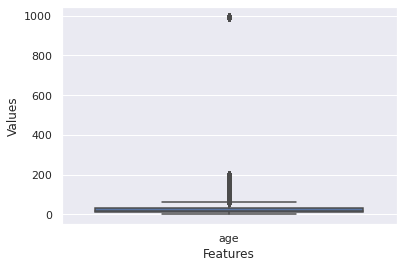

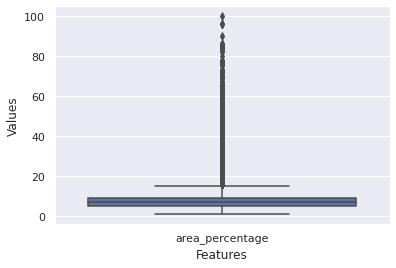

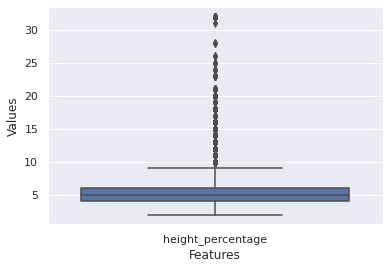

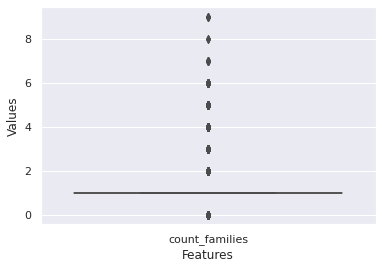

In [57]:
sns.set(style="darkgrid")

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["age"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Features")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["area_percentage"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Features")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["height_percentage"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Features")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["count_families"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Features")
plt.show()

In [58]:
df_box=df
df_non_box=df
df_non_box= df_non_box.drop(["age","area_percentage","height_percentage","count_families"], axis = 1)
df_box =  df_box[["building_id","age","area_percentage","height_percentage","count_families"]]
#df_box = df_box.drop(["building_id", "geo_level_1_id",	"geo_level_2_id",	"geo_level_3_id","count_floors_pre_eq","land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type	position","plan_configuration","has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone","has_superstructure_stone_flag","has_superstructure_cement_mortar_stone","has_superstructure_mud_mortar_brick	has_superstructure_cement_mortar_brick","has_superstructure_timber","has_superstructure_bamboo","has_superstructure_rc_non_engineered	has_superstructure_rc_engineered","has_superstructure_other","legal_ownership_status","has_secondary_use","has_secondary_use_agriculture","has_secondary_use_hotel","has_secondary_use_rental","has_secondary_use_institution","	has_secondary_use_school","has_secondary_use_industry","has_secondary_use_health_post","has_secondary_use_gov_office","has_secondary_use_use_police","has_secondary_use_other"	] , axis=1)


test_df_box=test_df
test_df_non_box=test_df
test_df_non_box= test_df_non_box.drop(["age","area_percentage","height_percentage","count_families"], axis = 1)
test_df_box =  test_df_box[["building_id","age","area_percentage","height_percentage","count_families"]]
#test_df_box = test_df_box.drop(["building_id", "geo_level_1_id",	"geo_level_2_id",	"geo_level_3_id","count_floors_pre_eq","land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type	position","plan_configuration","has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone","has_superstructure_stone_flag","has_superstructure_cement_mortar_stone","has_superstructure_mud_mortar_brick	has_superstructure_cement_mortar_brick","has_superstructure_timber","has_superstructure_bamboo","has_superstructure_rc_non_engineered	has_superstructure_rc_engineered","has_superstructure_other","legal_ownership_status","has_secondary_use","has_secondary_use_agriculture","has_secondary_use_hotel","has_secondary_use_rental","has_secondary_use_institution","	has_secondary_use_school","has_secondary_use_industry","has_secondary_use_health_post","has_secondary_use_gov_office","has_secondary_use_use_police","has_secondary_use_other"	] , axis=1)


In [59]:
df_box.head()

,building_id,age,area_percentage,height_percentage,count_families
0,802906,30,6,5,1
1,28830,10,8,7,1
2,94947,10,5,5,1
3,590882,10,6,5,1
4,201944,30,8,9,1


In [60]:
df_box.shape

(260601, 5)

***Calculate IQR to remove outliers*** 

In [61]:
#Train data
Q1 = df_box.quantile(0.25)
Q3 = df_box.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#Test data
Q1 = test_df_box.quantile(0.25)
Q3 = test_df_box.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

building_id          528572.0
age                      20.0
area_percentage           4.0
height_percentage         2.0
count_families            0.0
dtype: float64


***Removing outliers***

In [62]:
df_out = df_box[~((df_box < (Q1 - 1.5 * IQR)) |(df_box > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(201947, 5)


In [63]:
test_df_out = test_df_box[~((test_df_box < (Q1 - 1.5 * IQR)) |(test_df_box > (Q3 + 1.5 * IQR))).any(axis=1)]
print(test_df_out.shape)

(67149, 5)


 Boxplots visualization ***after*** removal of outliers

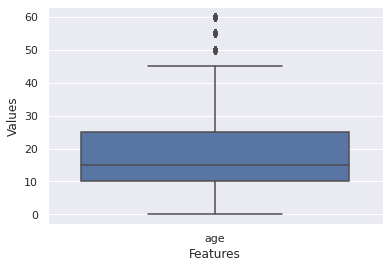

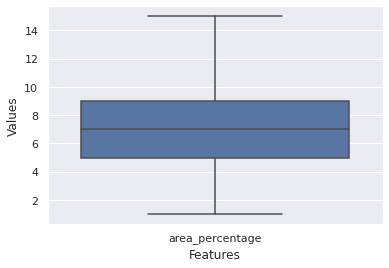

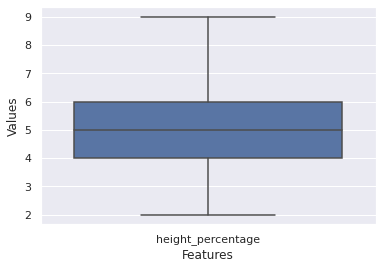

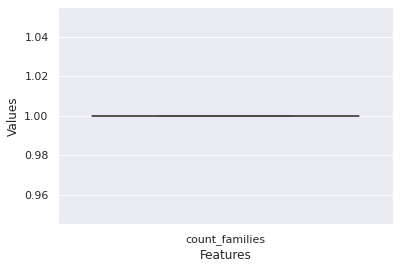

In [64]:
sns.set(style="darkgrid")

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_out), order=["age"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Features")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_out), order=["area_percentage"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Features")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_out), order=["height_percentage"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Features")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_out), order=["count_families"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Features")
plt.show()

In [65]:
df_final = pd.merge(df_out, df_non_box, on='building_id')

test_df_final = pd.merge(test_df_out, test_df_non_box, on='building_id')

In [66]:
df_final.head()

,building_id,age,area_percentage,height_percentage,count_families,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,30,6,5,1,6,487,12198,2,2,...,0,0,0,0,0,0,0,0,0,3
1,28830,10,8,7,1,8,900,2812,2,1,...,0,0,0,0,0,0,0,0,0,2
2,94947,10,5,5,1,21,363,8973,2,2,...,0,0,0,0,0,0,0,0,0,3
3,590882,10,6,5,1,22,418,10694,2,2,...,0,0,0,0,0,0,0,0,0,2
4,201944,30,8,9,1,11,131,1488,3,2,...,0,0,0,0,0,0,0,0,0,3


Shape before and after removal of outliers

In [67]:
print("Shape before removal of outliers",df.shape)
print("Shape after removal of outliers",df_final.shape)

Shape before removal of outliers (260601, 40)
Shape after removal of outliers (201947, 40)


In [68]:
x_final = df_final.drop(["damage_grade", "building_id"], axis=1) #features    
y_final  = df_final["damage_grade"] #class label

## **Correlation Matrix**

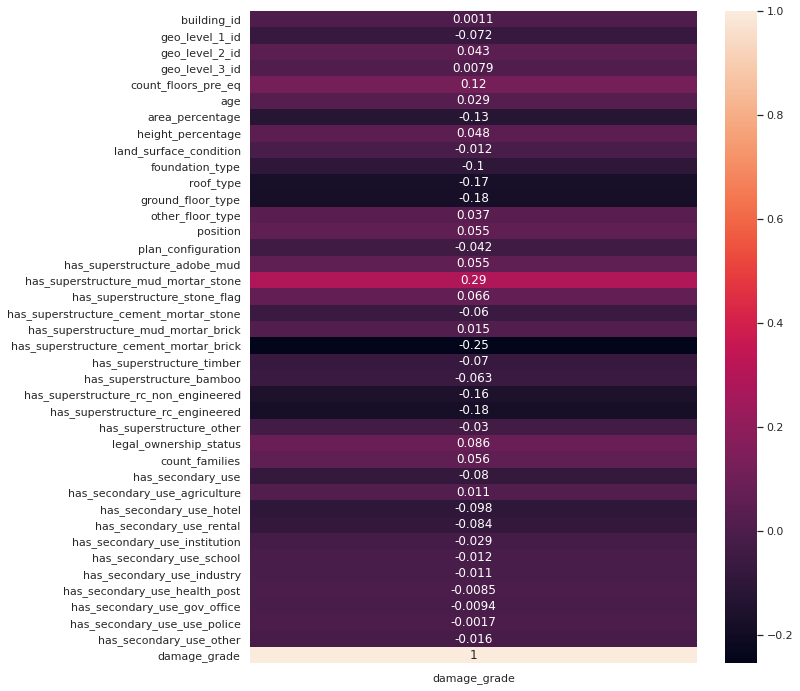

In [69]:
import seaborn as sns
cor = df.corr()["damage_grade"]
plt.figure(figsize=(10,12))
cor=pd.DataFrame(cor)
sns.heatmap(cor, annot=True)
plt.show()

## **Model Evaluation**

Ensemble machine learning algorithm **Random Forest classifier** is used in this project. As we saw above, the dataset is an imbalance dataset, we try to balance the dataset by using various sampling methods. The sampling methods used are as follows:


*   SMOTE
*   TomekLinks
*   SMOTE with TomekLinks
*   SMOTE with ENN



#### **Random Forest without sampling**

Random Forest classifier

Training Time: 71.78843116760254 seconds
Prediction Time: 0.8315937519073486 seconds
Training Score: 0.7535978013951732
Test Score: 0.7341916315919782
Micro F1 Score: 0.7341916315919782

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.35      0.46      3387
           2       0.73      0.86      0.79     23259
           3       0.75      0.62      0.68     13744

    accuracy                           0.73     40390
   macro avg       0.72      0.61      0.64     40390
weighted avg       0.73      0.73      0.72     40390


Confusion Matrix:


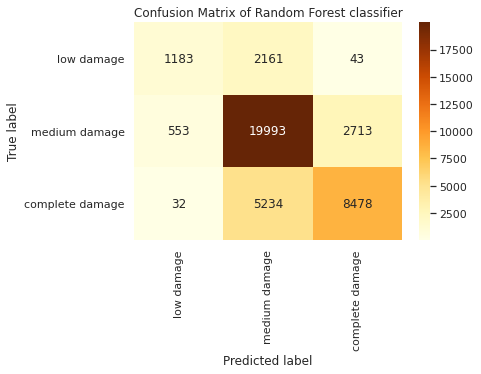

In [71]:
x_final = df_final.drop(["damage_grade", "building_id"], axis=1) #features    
y_final  = df_final["damage_grade"] #class label

X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.2, random_state = 42)

#Random Forest with SMOTE
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
#Training
start = time.time()
model = rf.fit(X_train, y_train)
end = time.time() - start

#Testing
start = time.time()
y_pred_test = model.predict(X_test)
end_pred = time.time() - start

print("Random Forest classifier")
print()
print("Training Time: {} seconds".format(end))
print("Prediction Time: {} seconds".format(end_pred))
print("Training Score: {}".format(rf.score(X_train, y_train)))
print("Test Score: {}".format(rf.score(X_test, y_test)))
print("Micro F1 Score: {}".format(f1_score(y_test, y_pred_test, average='micro')))
print()

#Classification Report
print('Classification Report:')
report = classification_report(y_test, y_pred_test)
print(report)
print()

#Confusion Matrix
class_names = ['low damage', 'medium damage', 'complete damage']
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm,
                  index = class_names, 
                  columns = class_names)

#plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, cmap="YlOrBr", fmt='g')
#plt.grid(False) 
plt.title("Confusion Matrix of Random Forest classifier")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### **Random Forest with SMOTE sampling** (over-sampling)

Random Forest classifier with SMOTE sampling

Training Time: 151.72621178627014 seconds
Prediction Time: 1.6484544277191162 seconds
Training Score: 0.7914972979006074
Test Score: 0.7708570358742457
Micro F1 Score: 0.7708570358742457

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.87      0.86     23197
           2       0.69      0.71      0.70     23156
           3       0.77      0.73      0.75     23084

    accuracy                           0.77     69437
   macro avg       0.77      0.77      0.77     69437
weighted avg       0.77      0.77      0.77     69437


Confusion Matrix:


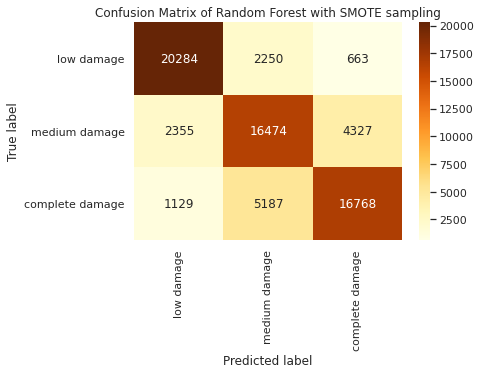

In [72]:
#Features and class labels
x_final = df_final.drop(["damage_grade", "building_id"], axis=1) #features    
y_final  = df_final["damage_grade"] #class label

#SMOTE sampling
oversample = SMOTE()
x_final, y_final = oversample.fit_resample(x_final, y_final)

#Spliting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.2, random_state = 42)

#Random Forest with SMOTE
rf_smote = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
#Training
start = time.time()
model = rf_smote.fit(X_train, y_train)
end = time.time() - start

#Testing
start = time.time()
y_pred_test = model.predict(X_test)
end_pred = time.time() - start

print("Random Forest classifier with SMOTE sampling")
print()
print("Training Time: {} seconds".format(end))
print("Prediction Time: {} seconds".format(end_pred))
print("Training Score: {}".format(rf_smote.score(X_train, y_train)))
print("Test Score: {}".format(rf_smote.score(X_test, y_test)))
print("Micro F1 Score: {}".format(f1_score(y_test, y_pred_test, average='micro')))
print()

#Classification Report
print('Classification Report:')
report = classification_report(y_test, y_pred_test)
print(report)
print()

#Confusion Matrix
class_names = ['low damage', 'medium damage', 'complete damage']
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm,
                  index = class_names, 
                  columns = class_names)


sns.heatmap(cm_df, annot=True, cmap="YlOrBr", fmt='g')
plt.title("Confusion Matrix of Random Forest with SMOTE sampling")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### **Random Forest with TomekLinks sampling** (under-sampling)



Random Forest classifier with TomekLinks sampling

Training Time: 64.43418169021606 seconds
Prediction Time: 0.7119390964508057 seconds
Training Score: 0.7816541417531088
Test Score: 0.7625696735297464
Micro F1 Score: 0.7625696735297464

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.41      0.51      3420
           2       0.76      0.88      0.81     20369
           3       0.79      0.67      0.72     11375

    accuracy                           0.76     35164
   macro avg       0.75      0.65      0.68     35164
weighted avg       0.76      0.76      0.75     35164


Confusion Matrix:


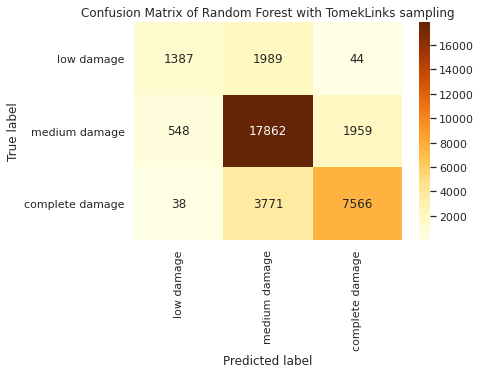

In [74]:
#Features and class labels
x_final = df_final.drop(["damage_grade", "building_id"], axis=1) #features    
y_final  = df_final["damage_grade"] #class label

#TomekLinks Sampling
oversample =  TomekLinks()
x_final, y_final = oversample.fit_resample(x_final, y_final)

#Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.2, random_state = 42)

#Random Forest with TomekLinks
rf_smotetomek = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
#Training
start = time.time()
model = rf_smotetomek.fit(X_train, y_train)
end = time.time() - start

#Testing
start = time.time()
y_pred_test = model.predict(X_test)
end_pred = time.time() - start

print("Random Forest classifier with TomekLinks sampling")
print()
print("Training Time: {} seconds".format(end))
print("Prediction Time: {} seconds".format(end_pred))
print("Training Score: {}".format(rf_smotetomek.score(X_train, y_train)))
print("Test Score: {}".format(rf_smotetomek.score(X_test, y_test)))
print("Micro F1 Score: {}".format(f1_score(y_test, y_pred_test, average='micro')))
print()

#Classification Report
print('Classification Report:')
report = classification_report(y_test, y_pred_test)
print(report)
print()

#Confusion Matrix
class_names = ['low damage', 'medium damage', 'complete damage']
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm,
                  index = class_names, 
                  columns = class_names)

#plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, cmap="YlOrBr", fmt='g')
#plt.grid(False) 
plt.title("Confusion Matrix of Random Forest with TomekLinks sampling")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### **Random Forest with SMOTE-ENN sampling** (combination of over-sampling and under-sampling)

Random Forest classifier with SMOTE-ENN sampling

Training Time: 132.33746552467346 seconds
Prediction Time: 1.4957454204559326 seconds
Training Score: 0.7944951332406331
Test Score: 0.7758746799951237
Micro F1 Score: 0.7758746799951237

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.88      0.87     19296
           2       0.71      0.72      0.72     23274
           3       0.78      0.74      0.76     23054

    accuracy                           0.78     65624
   macro avg       0.78      0.78      0.78     65624
weighted avg       0.78      0.78      0.78     65624


Confusion Matrix:


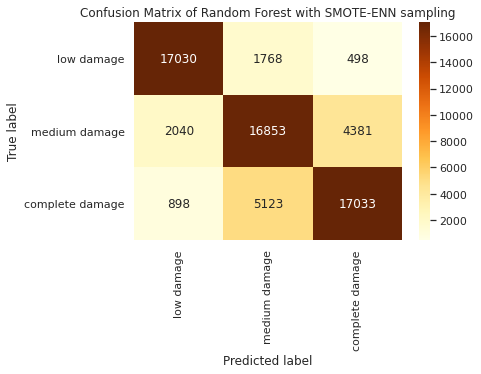

In [78]:

#Features and class labels
x_final = df_final.drop(["damage_grade", "building_id"], axis=1) #features    
y_final  = df_final["damage_grade"] #class label

#SMOTEENN sampling
oversample =  SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
x_final, y_final = oversample.fit_resample(x_final, y_final)

#Splitting data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.2, random_state = 42)

#Random Forest with SMOTE-ENN
rf_smoteenn = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
#Training
start = time.time()
model = rf_smoteenn.fit(X_train, y_train)
end = time.time() - start

#Testing
start = time.time()
y_pred_test = model.predict(X_test)
end_pred = time.time() - start

print("Random Forest classifier with SMOTE-ENN sampling")
print()
print("Training Time: {} seconds".format(end))
print("Prediction Time: {} seconds".format(end_pred))
print("Training Score: {}".format(rf_smoteenn.score(X_train, y_train)))
print("Test Score: {}".format(rf_smoteenn.score(X_test, y_test)))
print("Micro F1 Score: {}".format(f1_score(y_test, y_pred_test, average='micro')))
print()

#Classification Report
print('Classification Report:')
report = classification_report(y_test, y_pred_test)
print(report)
print()

#Confusion Matrix
class_names = ['low damage', 'medium damage', 'complete damage']
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm,
                  index = class_names, 
                  columns = class_names)

sns.heatmap(cm_df, annot=True, cmap="YlOrBr", fmt='g')
plt.title("Confusion Matrix of Random Forest with SMOTE-ENN sampling")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### **Random Forest with SMOTETomek sampling** (combination of over-sampling and under-sampling)

Random Forest classifier with SMOTE-Tomek sampling

Training Time: 136.18944668769836 seconds
Prediction Time: 1.489389181137085 seconds
Training Score: 0.7906364937582665
Test Score: 0.7714082792207793
Micro F1 Score: 0.7714082792207793

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.88      0.86     22594
           2       0.69      0.72      0.70     23047
           3       0.78      0.73      0.75     23351

    accuracy                           0.77     68992
   macro avg       0.77      0.77      0.77     68992
weighted avg       0.77      0.77      0.77     68992


Confusion Matrix:


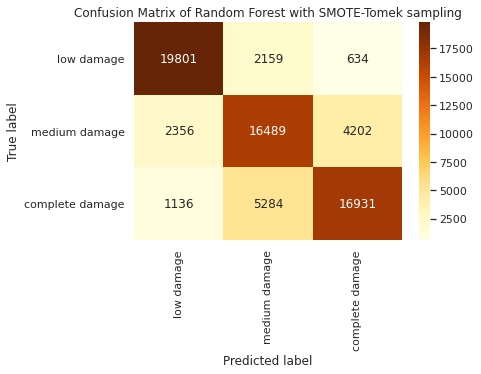

In [76]:
#Featurs and class label
x_final = df_final.drop(["damage_grade", "building_id"], axis=1) #features    
y_final  = df_final["damage_grade"] #class label

#Sampling
oversample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x_final, y_final = oversample.fit_resample(x_final, y_final)

#Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.2, random_state = 42)

#Random Forest with SMOTETomek
rf_smotetomek = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
#Training
start = time.time()
model = rf_smotetomek.fit(X_train, y_train)
end = time.time() - start

#Testing
start = time.time()
y_pred_test = model.predict(X_test)
end_pred = time.time() - start

print("Random Forest classifier with SMOTE-Tomek sampling")
print()
print("Training Time: {} seconds".format(end))
print("Prediction Time: {} seconds".format(end_pred))
print("Training Score: {}".format(rf_smotetomek.score(X_train, y_train)))
print("Test Score: {}".format(rf_smotetomek.score(X_test, y_test)))
print("Micro F1 Score: {}".format(f1_score(y_test, y_pred_test, average='micro')))
print()

#Classification Report
print('Classification Report:')
report = classification_report(y_test, y_pred_test)
print(report)
print()

#Confusion Matrix
class_names = ['low damage', 'medium damage', 'complete damage']
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm,
                  index = class_names, 
                  columns = class_names)

#plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, cmap="YlOrBr", fmt='g')
#plt.grid(False) 
plt.title("Confusion Matrix of Random Forest with SMOTE-Tomek sampling")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

To measure the performance of our algorithms, we have used the F1 score which balances the precision and recall of a classifier. Traditionally, the F1 score is used to evaluate performance on a binary classifier, but since we have three possible labels we will use a variant called the micro averaged F1 score

Of all the results obtained, we achieve the best performance with Random Forest classifier using SMOTE-ENN sampling method with best score of **77.58%**. 

## **Feature Importance**

In [79]:
df_without_Bid = train_df.drop(["building_id"], axis=1)
X = df_without_Bid

In [80]:
results = list(zip(X, rf_smoteenn.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
importance

,Feature,Importance
4,age,2.529354e-01
16,has_superstructure_stone_flag,2.519087e-01
5,area_percentage,1.207657e-01
0,geo_level_1_id,6.526361e-02
15,has_superstructure_mud_mortar_stone,6.131159e-02
6,height_percentage,5.978494e-02
19,has_superstructure_cement_mortar_brick,2.995205e-02
1,geo_level_2_id,2.170869e-02
17,has_superstructure_cement_mortar_stone,2.114406e-02
2,geo_level_3_id,1.623280e-02


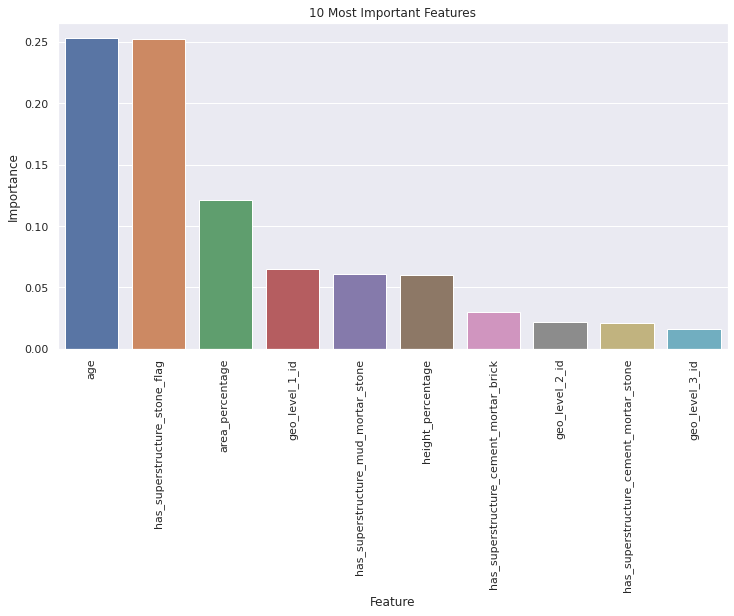

In [81]:
plt.figure(figsize=(12,6))
importance_10 = importance.head(10)
plot = sns.barplot(x=importance_10["Feature"], y=importance_10["Importance"])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title("10 Most Important Features")
plt.show()

## **Prediction on Test dataset**

In [82]:
# now predicting on test dataset
test=test_df.drop(["building_id"],axis=1)
rf_pred_test=rf_smoteenn.predict(test)

In [87]:
#submission=pd.read_csv(os.path.join(root_path, 'submission_format.csv'))
submission=pd.read_csv(r"./data/submission_format.csv")
submission=submission.drop(["damage_grade"],axis=1)
rf_pred_test=pd.DataFrame(rf_pred_test)
submission["damage_grade"]=rf_pred_test
submission.head()
submission.to_csv("submission.csv", index=False)